# Generate the background for the poster

The poster background is a plot of the `earth_relief_XX` GMT data with some GPS velocities from the Plate Boundary Observatory. We're using a General Perspective projection that is looking down and slightly to the south on the US West coast.

In [1]:
import pandas as pd
from IPython.display import Image, display
import gmt

Load the data in a pandas DataFrame.

In [2]:
data = pd.read_csv('data/pbo_gps_velocity.csv', delim_whitespace=True)
data.head()

lon        lat  velocity_east  velocity_north    azimuth  velocity
0  268.819738  30.407425       -0.00030         0.00087 -19.025606  0.000920
1  268.819738  30.407425       -0.00030         0.00088 -18.824710  0.000930
2  268.819738  30.407425       -0.00030         0.00087 -19.025606  0.000920
3  268.819738  30.407425       -0.00030         0.00087 -19.025606  0.000920
4  266.902397  31.750801       -0.00016         0.00206  -4.441241  0.002066

The projection we want to use is a bit complex so we'll build the projection string in pieces so we know what it all means.

In [3]:
proj = ('G{lon}/{lat}/{alt}/{azim}/{tilt}/{twist}/{width}/{height}/20i'
        .format(lon=-138, lat=40, alt=1000, azim=20, tilt=40, 
                twist=-10, width=142, height=100))
print(proj)

G-138/40/1000/20/40/-10/142/100/20i


Make the figure in GMT/Python:

/home/leo/miniconda3/envs/aogs2018-gmt/lib/python3.6/site-packages/gmt/clib/utils.py:240: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  return vector.as_matrix()


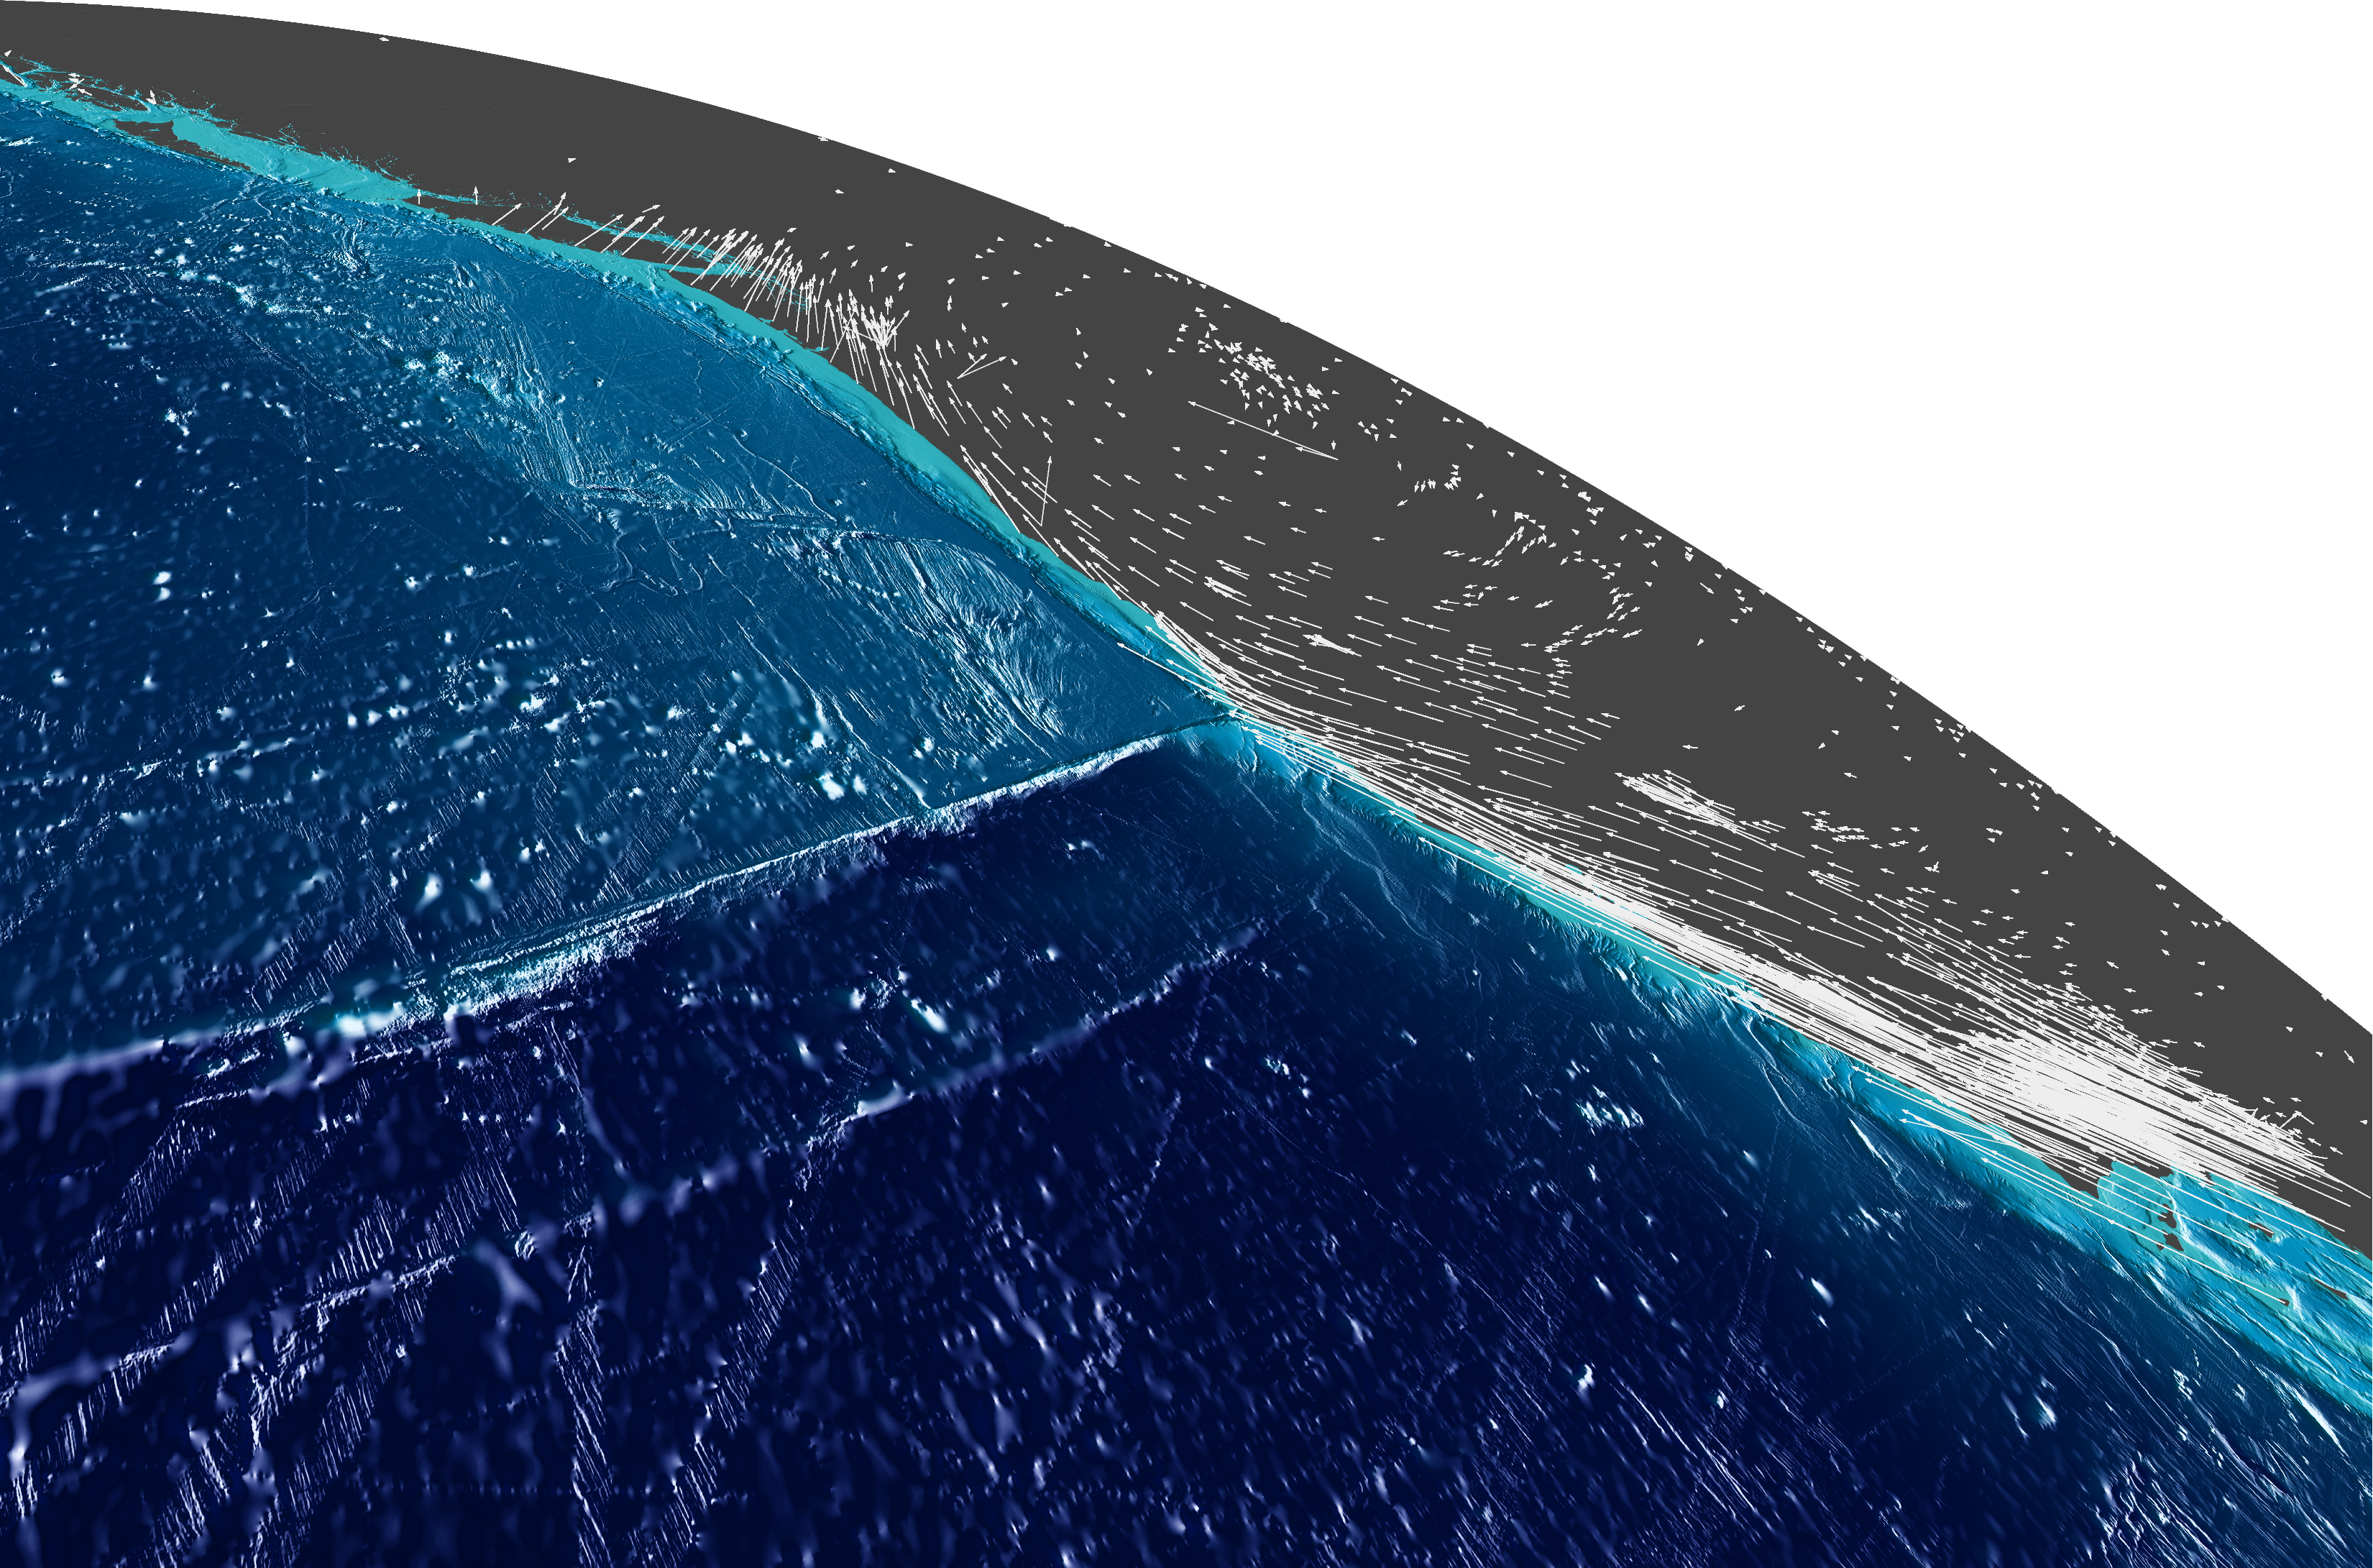

In [4]:
# Start a new figure
fig = gmt.Figure()
# Plot a hill shaded image of the builtin topography data
fig.grdimage('@earth_relief_15s', region=[-140, -110, 20, 60], 
             projection=proj, cmap='ocean', shading='+a120+nt1.5',
             X='-9i')
# Fill in the continents with a gray color
fig.coast(land='#444444', resolution='i', area_thresh='0/0/1')
# Plot the velocity as vectors given an azimuth and length
fig.plot(x=data.lon, y=data.lat, direction=(data.azimuth, data.velocity*50),
        style='V0.03i+e', color='#eeeeee', pen='thinnest,#eeeeee,solid')
fig.show(width="100%")

Now we can save the figure as high resolution png:

In [14]:
fig.savefig('poster-background.png', transparent=True, dpi=1000, anti_alias=False)

## Using command-line GMT

The same plot can be made using command-line. Below, we use the new *modern mode* in GMT6 to make the plot:

In [12]:
%%bash 
input=data/pbo_gps_velocity.csv
latitude=40
longitude=-138.0
altitude=1000.0
tilt=40
azimuth=20
twist=-10
width=142
height=100
proj=-JG${longitude}/${latitude}/${altitude}/${azimuth}/${tilt}/${twist}/${width}/${height}/20i

gmt begin commandline-version PNG
    # Use a lower resolution relief so it won't take so long to render
    gmt grdimage -R-140/-110/20/60 $proj -X-9i @earth_relief_05m -Cocean -I+a120+nt1.5
    gmt coast -G"#444444" -Di -A0/0/1
    # Need to remove the header from the CSV file
    tail $input -n +1 | gmt plot -SV0.03i+e -G"#eeeeee" -W"thinnest,#eeeeee,solid" -i"0,1,4,5+s50"
gmt end

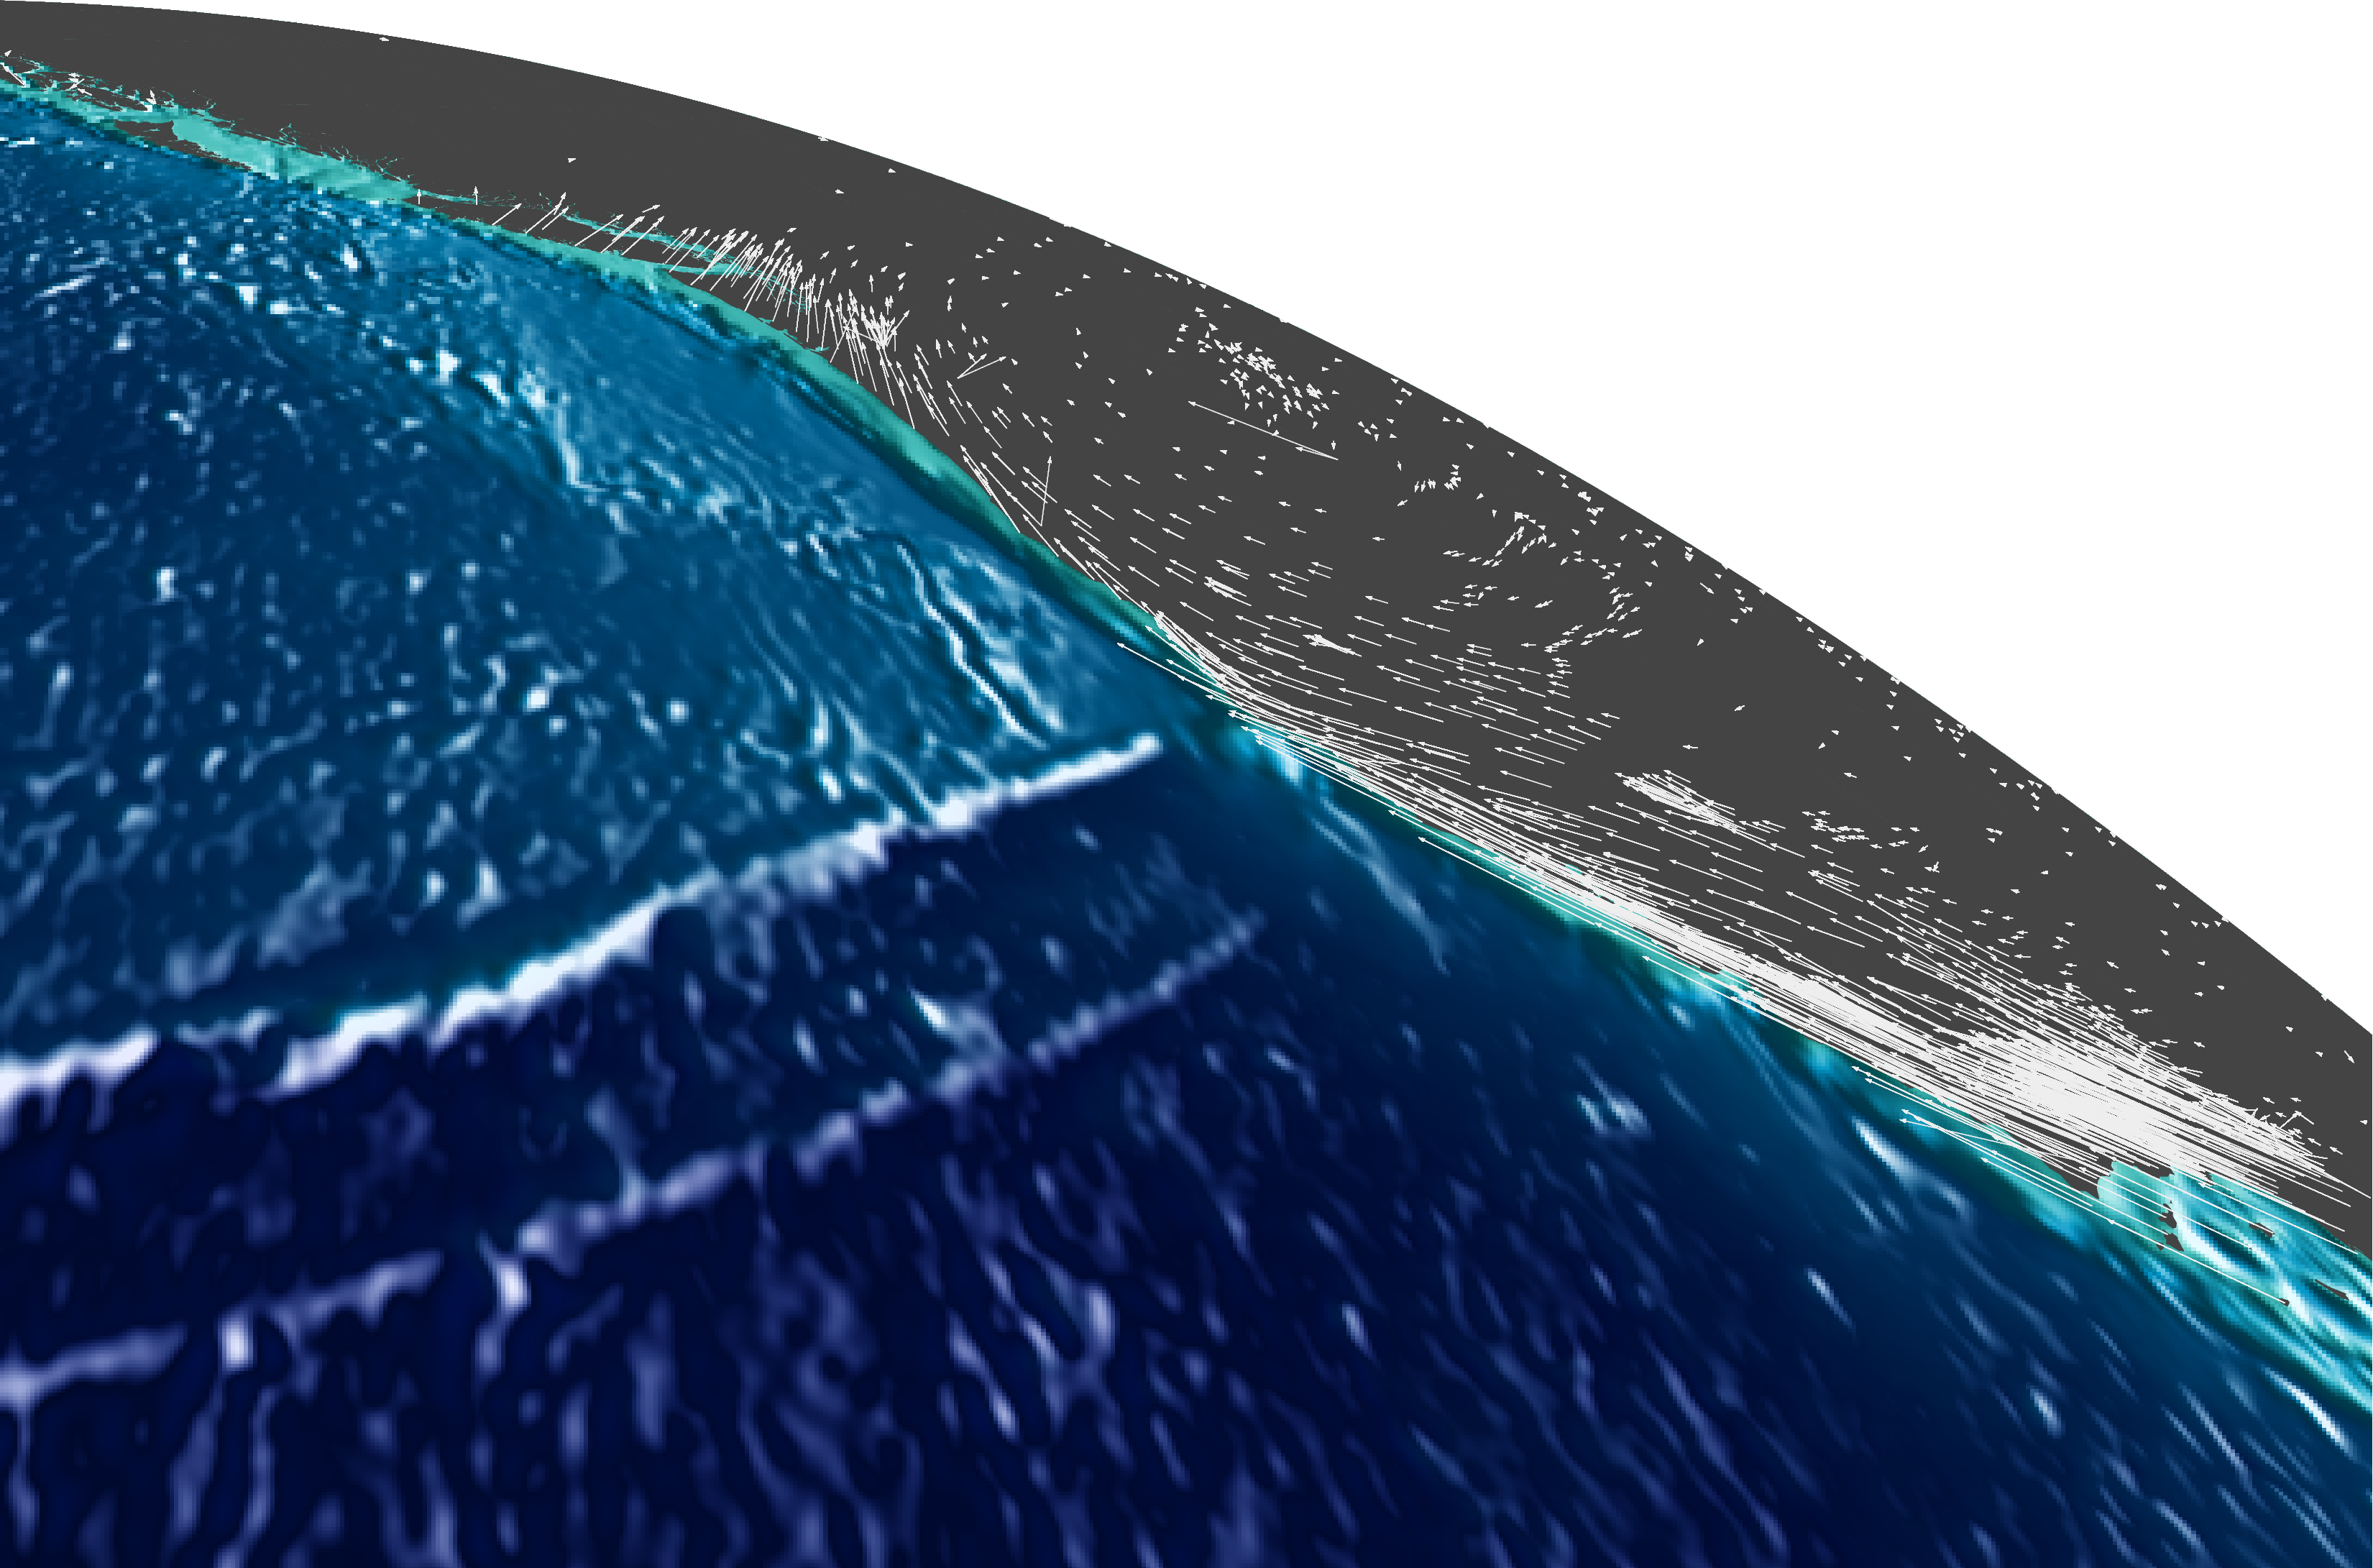

In [13]:
display(Image('commandline-version.png', embed=True))
!rm commandline-version.png